In [8]:
import numpy as np
import mfsc_cnn_fun as dataimport
import glob
from keras.models import model_from_json

In [9]:
maxlen = 100
batch_size = 32
loss = 'categorical_crossentropy'
model_json='hb_model_orthogonal_experiment_norm.json'
weights='Model2_weights.hdf5'

def test(filename, model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy'):
   
    #loads filename, transfrorms data using short-time Fourier transform, logscales the result and splits it into 129x129 squares
    X = dataimport.data_from_file(filename=str(filename)+".wav", width=129, height=256, max_frames=10)
    
    predictions = np.zeros(len(X))
    z = 0
    
    #Makes predictions for each 129x129 square
    for frame in X:
        predict_frame = np.zeros((1, 3, 129, 129))
        predict_frame[0] = frame
        predictions_all = model.predict_proba(predict_frame, batch_size=batch_size)
        predictions[z] = predictions_all[0][1]

        z += 1
    
    #Averages the results of per-frame predictions    
    average = np.average(predictions)
    average_prediction = round(average)
    		
    #Prints the result
  #  if int(average_prediction) == 0.0:
        #append file with -1
       # write_answer(filename=filename, result="-1")
        
      #  print('Result for '+filename+': '+'Normal (-1)')
        
   # else:
        #append file with 1
       # write_answer(filename=filename, result="1")    
        
     #   print('Result for '+filename+': '+'Abnormal (1)')        
    
    return int(average_prediction)






import os
os.chdir("C:\\Users\\Josip")

model = model_from_json(open(model_json).read())

model.load_weights(weights)

optimizer='adam'

loss='categorical_crossentropy'

model.compile(loss=loss, optimizer=optimizer)


In [10]:
os.chdir("C:\\Users\\Josip\\abnormal")
os.listdir("C:\\Users\\Josip\\abnormal")

['b0037.wav', 'b0054.wav']

In [11]:
print((test("b0054", model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy')))

1


In [12]:
print((test("b0037", model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy')))

1


In [13]:
os.chdir("C:\\Users\\Josip\\normal")
os.listdir("C:\\Users\\Josip\\normal")

['b0003.wav', 'b0004.wav']

In [14]:
print((test("b0003", model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy')))

0


In [15]:
print((test("b0004", model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy')))

0


Testiranje odabranog modela na test setu

In [16]:

abnormal1=[]
normal1=[]
os.chdir("C:\\Users\\Josip\\test set\\abnormal\\")
for filename in glob.glob('*.wav'):
    abnormal1.append(test(filename[:-4], model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy'))


os.chdir("C:\\Users\\Josip\\test set\\normal\\")
for filename in glob.glob('*.wav'):
    normal1.append(test(filename[:-4], model_json='hb_model_orthogonal_experiment_norm.json', 
         weights='Model2_weights.hdf5', 
         optimizer='adam', 
         loss='categorical_crossentropy'))

print("Recall")
print(sum(abnormal1)/len(abnormal1))

print("Specificity")
print(1-sum(normal1)/len(normal1))

print("Mean score")
print( (sum(abnormal1)/len(abnormal1)+1-sum(normal1)/len(normal1))  /2)

C:\Users\Josip\mfsc_cnn_fun.py:326: RuntimeWarning: divide by zero encountered in log10
  


Recall
0.7786259541984732
Specificity
0.8676470588235294
Mean score
0.8231365065110013


Dakle uspješnost modela je  0.82

***Krivulje učenja i funkcije gubitka u odnosu na epohe***

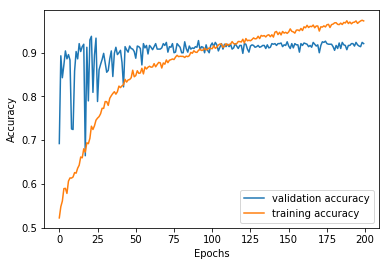

In [21]:
import pickle
import matplotlib.pyplot as plt

with open('C:\\Users\\Josip\\Dictionary_model2', 'rb') as handle:
  b = pickle.loads(handle.read()) 
plt.plot(b["val_acc"],label="validation accuracy")
plt.plot(b["acc"],label="training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

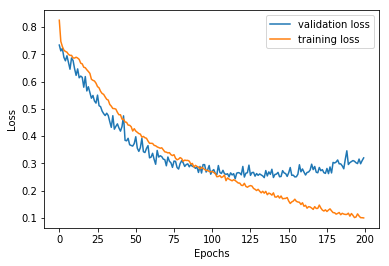

In [22]:

plt.plot(b["val_loss"],label="validation loss")
plt.plot(b["loss"],label="training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()